In [1]:
##I spent way too much time trying to make Docker find a text or pdf file on a Windows host.
##I suggest using other methods to read on files. Here I used a direct approach because the data set was small and
##I was in a hurry.
##There is an alternate approach which is to pull from the internet, which is included buy commented out.
##I will test the second approach later.
##HFN 2.2.2024

import fitz  # PyMuPDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
#enter text into an object
# Define text directly in the notebook
text_data = """
Two roads diverged in a yellow wood, and sorry I could not travel them both and be one traveler, 
long I stood and looked down
"""

##Alternate method to import text file
##import os
# Download text file from GitHub
##os.system("wget https://raw.githubusercontent.com/your_username/your_repository/main/your_text_file.txt")


In [3]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

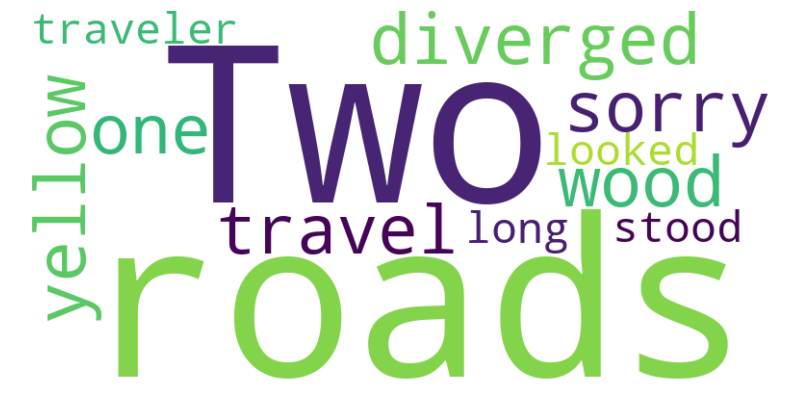

In [4]:
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (you can do this once)
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(text_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from nltk.corpus import stopwords

# Download NLTK resources (you can do this once)
nltk.download('stopwords')

# Remove stop words
stop_words = set(stopwords.words('english'))

# Add custom words to the stop_words set
custom_stop_words = {'provide', 'product'}
stop_words.update(custom_stop_words)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


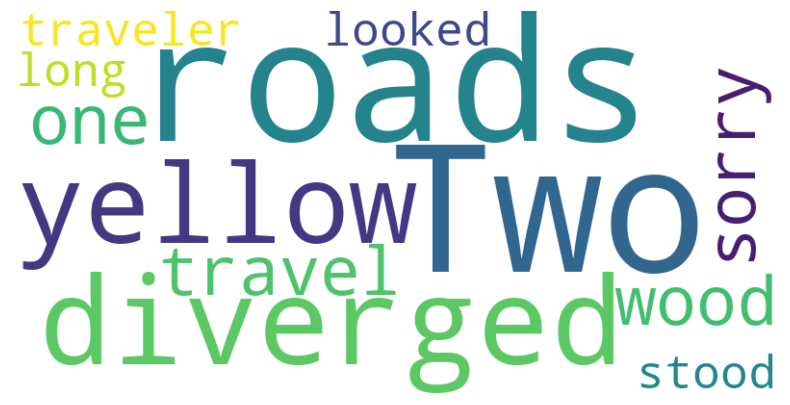

In [7]:
# Join the filtered tokens into a single string
filtered_text = ' '.join(filtered_tokens)

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
#save the word cloud into a .png
# Save the WordCloud as a .png file
wordcloud.to_file("wordcloud.png")

In [9]:
print("Current working directory:", os.getcwd())

Current working directory: /app


In [10]:
##To get it out of the container could be tricky
##In a Debian linux system like Ubuntu, use the 'cp' command to move it. 
##I used sudo docker cp 'containerID':/app/wordcloud.png /path/to/destination/file/wordcloud.png